In [1]:
from itertools import cycle
from operator import add

In [2]:
input_address = 368078
#input_address = 10

In [3]:
direction_deltas = [(1, 0), (0, 1), (-1, 0), (0, -1)]
all_direction_deltas = [(1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (-1, -1), (0, -1), (1, -1)]

In [4]:
def coord_add(a1, a2):
    return tuple(map(add, a1, a2))

In [5]:
def neighbour_count(c, grid):
    # cardinal directions only
    count = 0
    for d in direction_deltas:
        if coord_add(c, d) in grid:
            count += 1
    return count

In [6]:
direction = cycle(direction_deltas)

current_pos = (0, 0)
current_dir = next(direction)
current_address = 1

grid = {}
inv_grid = {}
while current_address <= input_address:
    #print(f'number = {current_address}, location = {currentpos}, dir = {currentdir}')
    grid[current_pos] = current_address
    inv_grid[current_address] = current_pos
    current_address += 1
    current_pos = coord_add(current_pos, current_dir)
    if neighbour_count(current_pos, grid) == 1:
        current_dir = next(direction) # turn left if the next cell only has one populated neighbour

In [7]:
print(f'part1 answer: {sum(map(abs, inv_grid[input_address]))}')

part1 answer: 371


In [8]:
def neighbour_sum(c, g):
    total = 0
    for d in all_direction_deltas:
        if coord_add(c, d) in g:
            total += g[coord_add(c, d)]
    return total

In [9]:
direction = cycle(direction_deltas)

current_pos = (0, 0)
current_dir = next(direction)
current_val = 1

sum_grid = {}

while current_val <= input_address:
    #print(f'number = {current_address}, location = {currentpos}, dir = {currentdir}')
    sum_grid[current_pos] = current_val
    current_pos = coord_add(current_pos, current_dir)
    current_val = neighbour_sum(current_pos, sum_grid)
    if neighbour_count(current_pos, sum_grid) == 1:
        current_dir = next(direction) # turn left if the next cell only has one populated neighbour    

In [10]:
print(f'part 2 answer: {current_val}')

part 2 answer: 369601


# Plot the part2 values

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [12]:
x_min = min(map(lambda x: x[0], sum_grid.keys()))
x_max = max(map(lambda x: x[0], sum_grid.keys()))
y_min = min(map(lambda x: x[1], sum_grid.keys()))
y_max = max(map(lambda x: x[1], sum_grid.keys()))


In [13]:
l = []
for i in sum_grid.items():
    (x, y), z = i
    l.append([x, y, z])
df = pd.DataFrame(l, columns=['x', 'y', 'z'])

## First the path in 2D

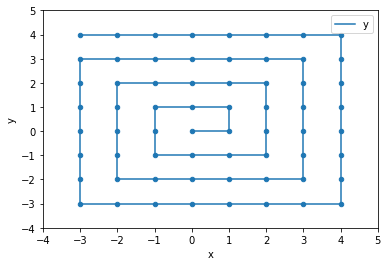

In [14]:
ax = df[['x', 'y']].plot(x='x', y='y', xlim=(x_min-1, x_max+1), ylim=(y_min-1, y_max+1))
df[['x', 'y']].plot(ax=ax, kind='scatter', x='x', y='y')

## Now the path and height in 3D

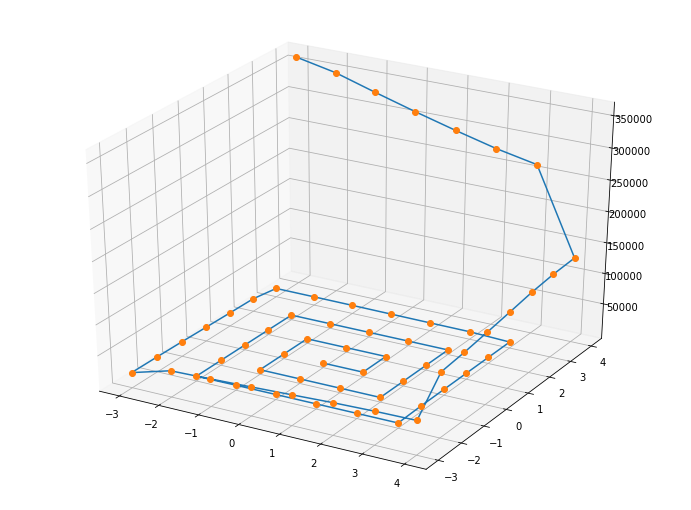

In [15]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')
ax.plot(df.x, df.y, df.z)
ax.plot(df.x, df.y, df.z, 'o')

## and again, scaled logarithmically

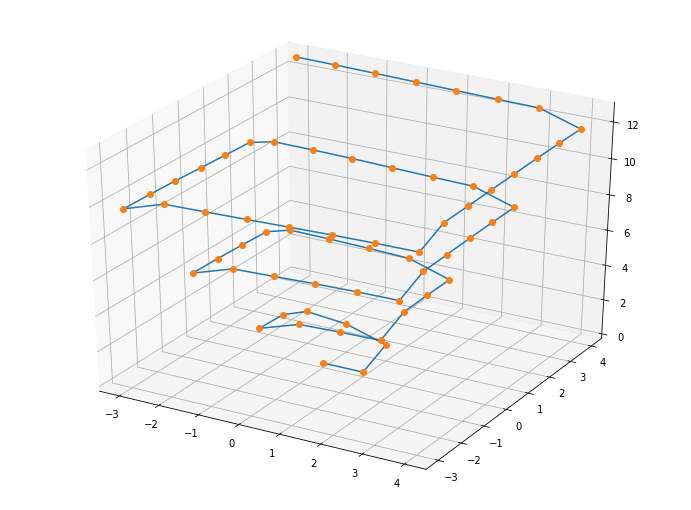

In [16]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')
ax.plot(df.x, df.y, np.log(df.z))
ax.plot(df.x, df.y, np.log(df.z), 'o')